In [1]:
from sklearn.model_selection import train_test_split  # Divisão da base entre treino e teste
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns
import pandas as pd
import numpy as np
import random
import torch
import os

print(torch.__version__)

2.4.1+cu118


In [2]:
np.random.seed(123)  # Semente da aleatoriedade.
torch.manual_seed(123)  # Para os pesos da rede começar sempre iguais (BOA PRÁTICA).
torch.cuda.manual_seed(123)
random.seed(123)

baseFolder = os.path.join(os.path.dirname(os.getcwd()),"Bases")

previsoresData = os.path.join(baseFolder, "entradas_breast.csv")
classeData = os.path.join(baseFolder, "saidas_breast.csv")

previsores = pd.read_csv(previsoresData)  # Caracteristicas do tumor
classe = pd.read_csv(classeData)  # Maligno ou benigno

In [3]:
previsores.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,4.304801,4.835984,7.489124,2.366459,16.965766,0.851112,...,315.194921,25.677223,107.261213,880.583128,10.633281,25.259112,26.723742,8.745685,30.367174,1.964313
std,2430.243368,4.301036,24.298981,351.914129,21.074558,26.827478,35.618994,16.155145,53.846023,7.103493,...,1655.459336,6.146258,33.602542,569.356993,37.236433,96.473015,114.204035,39.465975,90.748044,14.464355
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.210000,16.170000,75.170000,420.300000,0.086410,0.065260,0.029580,0.020310,0.163400,0.057800,...,13.180000,21.080000,84.110000,515.300000,0.117800,0.150700,0.116800,0.064990,0.254900,0.071460
50%,13.850000,18.840000,86.240000,551.100000,0.095940,0.094620,0.063870,0.033900,0.181400,0.061660,...,15.150000,25.410000,97.660000,686.500000,0.133800,0.227900,0.249200,0.101500,0.288400,0.080060
75%,17.680000,21.800000,104.100000,782.700000,0.106100,0.132500,0.142500,0.077260,0.203600,0.066400,...,19.850000,29.720000,125.400000,1084.000000,0.150000,0.384200,0.431600,0.170800,0.331800,0.092110
max,9904.000000,39.280000,188.500000,2501.000000,123.000000,277.000000,313.000000,162.000000,304.000000,78.000000,...,9981.000000,49.540000,251.200000,4254.000000,185.000000,1058.000000,1252.000000,291.000000,544.000000,173.000000


In [4]:
classe.describe()


,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
print("CLASSES DIFERENTES: ", classe["0"].unique(), "0 = BENIGNO", "1 = MALIGNO")
print("DF SIZE L/C: ", classe.shape)  # Dimensões da classe

print(previsores.shape)
previsores.head(5)

CLASSES DIFERENTES:  [0 1] 0 = BENIGNO 1 = MALIGNO
DF SIZE L/C:  (569, 1)
(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='0'>

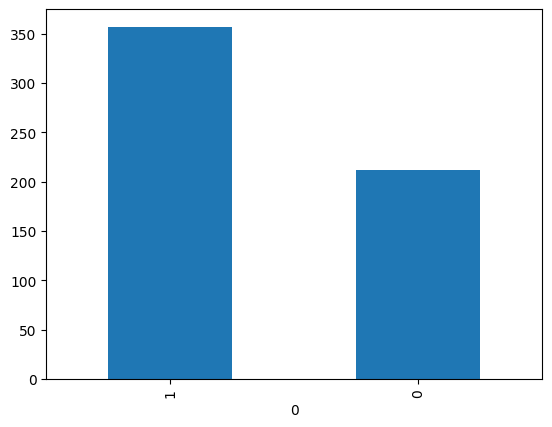

In [6]:
countClass = classe["0"].value_counts()
countClass.plot(kind="bar")

In [7]:
# DOCs: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
previsoresTreinamento, previsoresTeste, classeTreinamento, classeTeste = train_test_split(previsores, classe, test_size=.25)

In [8]:
# CONVERTENDO PARA UM ARRAY NUMPY
previsoresTreinamento = np.array(previsoresTreinamento)
previsoresTeste = np.array(previsoresTeste)
classeTreinamento = np.array(classeTreinamento)
classeTeste = np.array(classeTeste)

In [9]:
# CONVERTENDO PARA UM TENSOR DO PYTORCH
previsoresTreinamento = torch.tensor(np.array(previsoresTreinamento), dtype=torch.float)
previsoresTeste = torch.tensor(np.array(previsoresTeste), dtype=torch.float)
classeTreinamento = torch.tensor(classeTreinamento, dtype=torch.float)

In [10]:
dataset = torch.utils.data.TensorDataset(previsoresTreinamento, classeTreinamento)
type(dataset)

torch.utils.data.dataset.TensorDataset

In [11]:
trainLoader = torch.utils.data.DataLoader(dataset, batch_size=9, shuffle=True)

In [ ]:
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=60),
    nn.Linear(60,30),
    nn.ReLU(),
    nn.Linear(30,15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
)

print(list(classificador.parameters()))
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

[Parameter containing:
tensor([[-0.0744,  0.0060, -0.0907,  ...,  0.1305,  0.1458, -0.1683],
        [ 0.1559,  0.0872,  0.0796,  ...,  0.1558,  0.0109, -0.1479],
        [ 0.0288,  0.1509, -0.1725,  ...,  0.1516,  0.1005,  0.0639],
        ...,
        [-0.1720, -0.0588,  0.0655,  ..., -0.1021, -0.0993,  0.1419],
        [-0.1198,  0.1283, -0.1155,  ..., -0.1737,  0.1083, -0.1206],
        [ 0.0621,  0.1731, -0.1046,  ...,  0.0164,  0.0180, -0.1535]],
       requires_grad=True), Parameter containing:
tensor([-0.0055, -0.0695, -0.1252, -0.1505,  0.0511,  0.0237,  0.1064,  0.1416,
         0.0658, -0.0601,  0.1133,  0.0566,  0.1365,  0.0967,  0.0419,  0.0901,
        -0.1795,  0.0947,  0.1220, -0.0244, -0.1583,  0.1165,  0.0093, -0.0511,
        -0.0281,  0.1422, -0.0609,  0.1795,  0.1313,  0.0691,  0.0960, -0.1212,
        -0.1502,  0.1329,  0.1170, -0.1404, -0.1116,  0.0760,  0.0600,  0.1150,
        -0.1262,  0.0903,  0.0152, -0.1390,  0.1812, -0.0336, -0.0799, -0.1501,
        -0.06

In [13]:
for epoch in range(100):  # Roda por n epocas
    runningLoss = 0.0
    
    for data in trainLoader:  # Já está dividido em batchs
        inputs, labels =  data # previsores & classes
        optimizer.zero_grad()   # Zera o gradiente (gradiente indica a direção que o peso será ajustado)
        output = classificador(inputs)  # Pega as previsões para cada registro de entrada.
        
        # Calcula o erro (compara o previsto com o real)
        loss = criterion(output, labels)  # Função de perda
        
        loss.backward()
        optimizer.step()  # Atualiza os pesos.
        
        runningLoss += loss.item()
    
    print("Época %d: perda %.5f" % (epoch+1, runningLoss/len(trainLoader)))


Época 1: perda 1.31483
Época 2: perda 0.63291
Época 3: perda 0.53620
Época 4: perda 0.61294
Época 5: perda 0.58419
Época 6: perda 0.43635
Época 7: perda 0.45008
Época 8: perda 0.32784
Época 9: perda 0.36578
Época 10: perda 0.29316
Época 11: perda 0.30039
Época 12: perda 0.39181
Época 13: perda 0.28599
Época 14: perda 0.37190
Época 15: perda 0.31500
Época 16: perda 0.28959
Época 17: perda 0.22280
Época 18: perda 0.25678
Época 19: perda 0.55519
Época 20: perda 0.41075
Época 21: perda 0.32417
Época 22: perda 0.47799
Época 23: perda 0.28626
Época 24: perda 0.25105
Época 25: perda 0.30747
Época 26: perda 0.23348
Época 27: perda 0.24367
Época 28: perda 0.24586
Época 29: perda 0.23610
Época 30: perda 0.24127
Época 31: perda 0.24583
Época 32: perda 0.21995
Época 33: perda 0.19428
Época 34: perda 0.29157
Época 35: perda 0.21815
Época 36: perda 0.21433
Época 37: perda 0.21309
Época 38: perda 0.21571
Época 39: perda 0.20792
Época 40: perda 0.22480
Época 41: perda 0.22931
Época 42: perda 0.18919
É

In [ ]:
pesos = list(classificador.parameters())
classificador.eval()  
previsoes = classificador.forward(previsoresTeste)
previsoesBool = np.array(previsoes > 0.5)
print(previsoesBool)

[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

In [16]:
taxaAcerto = accuracy_score(classeTeste, previsoesBool)
print(taxaAcerto)

0.8881118881118881


<Axes: >

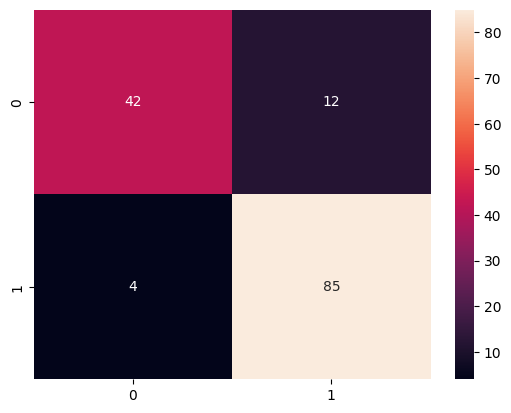

In [ ]:
matrizCOnfusao = confusion_matrix(classeTeste, previsoesBool)
sns.heatmap(matrizCOnfusao, annot=True)

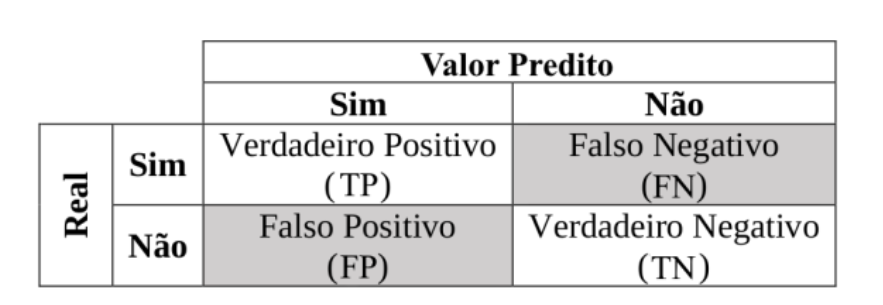

[array([0.852589], dtype=float32), array([0.9486667], dtype=float32), array([0.99991786], dtype=float32), array([0.45487598], dtype=float32), array([0.8219902], dtype=float32), array([0.5430624], dtype=float32), array([0.7004505], dtype=float32), array([0.37344384], dtype=float32), array([0.4292381], dtype=float32), array([0.50158006], dtype=float32), array([0.8447135], dtype=float32), array([0.61908317], dtype=float32), array([0.6538051], dtype=float32), array([0.7260059], dtype=float32), array([0.13939576], dtype=float32), array([0.9211865], dtype=float32)]
[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]


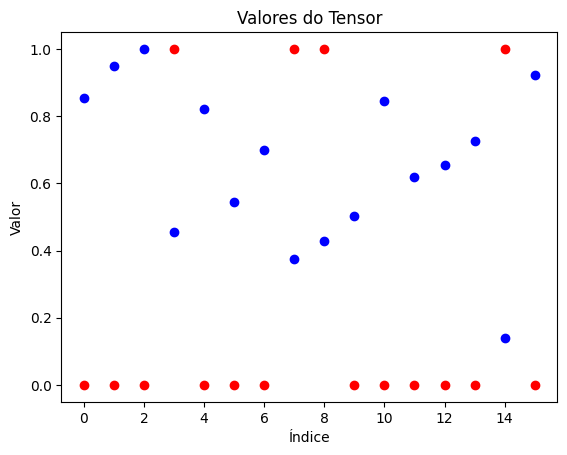

'\nNo gráfico abaixo pegamos os 17 valores que foram preditos errados e jogamos em um gráfico\npara tentar entender se era possível fazer a separação dos valores que foram preditos\n\n'

In [18]:
errados = []
baseoficial = []

x = previsoes.detach().numpy()

for i, y in enumerate(x):
    if classeTeste[i] != previsoesBool[i]:
        errados.append(x[i])
        baseoficial.append(classeTeste[i])

print(errados)
print(baseoficial)


# Criar um gráfico de linha (ou gráfico de barras)
plt.scatter(range(len(errados)), errados, color='blue', marker='o')  # 'o' define o formato do marcador
plt.scatter(range(len(baseoficial)), baseoficial, color='red', marker='o')  # 'o' define o formato do marcador

plt.title('Valores do Tensor')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Exibir o gráfico
plt.show()

"""
No gráfico abaixo pegamos os 17 valores que foram preditos errados e jogamos em um gráfico
para tentar entender se era possível fazer a separação dos valores que foram preditos

"""